<a href="https://colab.research.google.com/github/dkarakost/IDHV_Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
Lucas_dataset = "/content/LUCAS-SOIL-2018.csv"
df = pd.read_csv(Lucas_dataset)

According to this Dataset the:

**Depth** is the soil sampling depth (e.g., 0–20 cm or 20–30 cm)

**POINTID** is a unique identifier for the sampling point

**pH_CaCl2** is the soil pH measured in a calcium chloride solution (more stable than water pH)

**pH_H2O** is the soil pH measured in water

**EC** is the electrical conductivity of the soil, indicating salinity (in dS/m)

**OC** is the organic carbon content of the soil, related to fertility and structure

**P** is the phosphorus content in the soil, a vital nutrient for plant growth

**N** is the nitrogen content in the soil, essential for plant and microbial activity

**K** is the potassium content in the soil, crucial for plant metabolism

**NUTS_0** is the country-level code based on the NUTS (Nomenclature of Territorial Units for Statistics) classification

**NUTS_1** is the major socio-economic region code (first level NUTS region)

**NUTS_2** is the basic region code for regional policy implementation

**NUTS_3** is the small region code used for detailed geographical statistics

**TH_LAT** is the latitude coordinate of the sample location

**TH_LONG** is the longitude coordinate of the sample location

**SURVEY_DATE** is the date when the soil sample was collected

**Elev** is the elevation of the sampling site in meters above sea level

**LC** is the land cover class code at the sample site

**LU** is the land use class code at the sample site

**LC0_Desc** is the descriptive label for level 0 land cover class (broadest level)

**LC1_Desc** is the descriptive label for level 1 land cover class (more detailed)

**LU1_Desc** is the descriptive label for level 1 land use class




In [5]:
#check the 5 rows of the data
df.head(5)


Depth   POINTID  pH_CaCl2  pH_H2O     EC    OC CaCO3      P    N      K  \
0  0-20 cm  47862690       4.1    4.81   8.73  12.4     3  < LOD  1.1  101.9   
1  0-20 cm  47882704       4.1    4.93   5.06  16.7     1  < LOD  1.3   51.2   
2  0-20 cm  47982688       4.1    4.85  12.53  47.5     1   12.3  3.1  114.8   
3  0-20 cm  48022702       5.5    5.80  21.10  28.1     3  < LOD    2  165.8   
4  0-20 cm  48062708       6.1    6.48  10.89  19.4     2  < LOD  2.2   42.1   

   ... NUTS_3     TH_LAT    TH_LONG  SURVEY_DATE Elev   LC    LU  LC0_Desc  \
0  ...  AT113  47.150238  16.134212     06-07-18  291  C23  U120  Woodland   
1  ...  AT113  47.274272  16.175359     06-07-18  373  C21  U120  Woodland   
2  ...  AT113  47.123260  16.289693     02-06-18  246  C33  U120  Woodland   
3  ...  AT113  47.245693  16.357506     06-07-18  305  C22  U120  Woodland   
4  ...  AT113  47.296372  16.416782     05-07-18  335  C22  U120  Woodland   

                               LC1_Desc  LU1_Desc  
0             Other coniferous woodland  Forestry  
1  Spruce dominated coniferous woodland  Forestry  
2                  Other mixed woodland  Forestry  
3    Pine dominated coniferous woodland  Forestry  
4    Pine dominated coniferous woodland  Forestry  

[5 rows x 27 columns]

In [6]:
df.shape

(18984, 27)

In [7]:
df.isnull().sum()


Depth                   0
POINTID                 0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                      1
CaCO3                7763
P                      26
N                       1
K                       1
OC (20-30 cm)       18843
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_0                  0
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
TH_LAT                  0
TH_LONG                 0
SURVEY_DATE             0
Elev                    0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
dtype: int64

In [8]:
# delete the columns that we don't need for training
df=df.drop(columns=["OC (20-30 cm)", "CaCO3 (20-30 cm)", "Ox_Al", "Ox_Fe", "CaCO3"])

In [9]:
#checking again for null values
df.isnull().sum()

Depth           0
POINTID         0
pH_CaCl2        1
pH_H2O          1
EC              9
OC              1
P              26
N               1
K               1
NUTS_0          0
NUTS_1          0
NUTS_2          0
NUTS_3          0
TH_LAT          0
TH_LONG         0
SURVEY_DATE     0
Elev            0
LC              0
LU              0
LC0_Desc        0
LC1_Desc        0
LU1_Desc        0
dtype: int64

In [10]:
clean_df = df.dropna()
clean_df.isnull().sum()

Depth          0
POINTID        0
pH_CaCl2       0
pH_H2O         0
EC             0
OC             0
P              0
N              0
K              0
NUTS_0         0
NUTS_1         0
NUTS_2         0
NUTS_3         0
TH_LAT         0
TH_LONG        0
SURVEY_DATE    0
Elev           0
LC             0
LU             0
LC0_Desc       0
LC1_Desc       0
LU1_Desc       0
dtype: int64

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18950 entries, 0 to 18983
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        18950 non-null  object 
 1   POINTID      18950 non-null  int64  
 2   pH_CaCl2     18950 non-null  float64
 3   pH_H2O       18950 non-null  float64
 4   EC           18950 non-null  float64
 5   OC           18950 non-null  object 
 6   P            18950 non-null  object 
 7   N            18950 non-null  object 
 8   K            18950 non-null  object 
 9   NUTS_0       18950 non-null  object 
 10  NUTS_1       18950 non-null  object 
 11  NUTS_2       18950 non-null  object 
 12  NUTS_3       18950 non-null  object 
 13  TH_LAT       18950 non-null  float64
 14  TH_LONG      18950 non-null  float64
 15  SURVEY_DATE  18950 non-null  object 
 16  Elev         18950 non-null  int64  
 17  LC           18950 non-null  object 
 18  LU           18950 non-null  object 
 19  LC0_Desc 

In [12]:
clean_df.tail(2)

Depth   POINTID  pH_CaCl2  pH_H2O      EC    OC     P     N       K  \
18982  0-20 cm  32783636       5.3    5.90   10.42  38.3   7.3   3.1  1907.9   
18983  0-20 cm  33023682       4.7    4.97  141.70  98.7  33.7  10.1   231.1   

      NUTS_0  ... NUTS_3     TH_LAT   TH_LONG  SURVEY_DATE  Elev   LC    LU  \
18982     UK  ...  UKN13  54.759266 -6.358608     05-06-18   122  E20  U370   
18983     UK  ...  UKN12  55.208730 -6.156597     28-06-18   143  E20  U111   

        LC0_Desc                            LC1_Desc  \
18982  Grassland  Grassland without tree/shrub cover   
18983  Grassland  Grassland without tree/shrub cover   

                                                LU1_Desc  
18982                                        Residential  
18983  Agriculture (excluding fallow land and kitchen...  

[2 rows x 22 columns]

In [13]:
cleaned_df= clean_df.reset_index(drop=True)

In [14]:
cleaned_df.tail(2)

Depth   POINTID  pH_CaCl2  pH_H2O      EC    OC     P     N       K  \
18948  0-20 cm  32783636       5.3    5.90   10.42  38.3   7.3   3.1  1907.9   
18949  0-20 cm  33023682       4.7    4.97  141.70  98.7  33.7  10.1   231.1   

      NUTS_0  ... NUTS_3     TH_LAT   TH_LONG  SURVEY_DATE  Elev   LC    LU  \
18948     UK  ...  UKN13  54.759266 -6.358608     05-06-18   122  E20  U370   
18949     UK  ...  UKN12  55.208730 -6.156597     28-06-18   143  E20  U111   

        LC0_Desc                            LC1_Desc  \
18948  Grassland  Grassland without tree/shrub cover   
18949  Grassland  Grassland without tree/shrub cover   

                                                LU1_Desc  
18948                                        Residential  
18949  Agriculture (excluding fallow land and kitchen...  

[2 rows x 22 columns]

In [18]:
cleaned_df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K',
       'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG',
       'SURVEY_DATE', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [19]:
cleaned_df_num = cleaned_df.select_dtypes(include=["number"])

In [20]:
cleaned_df_num.columns

Index(['POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'TH_LAT', 'TH_LONG', 'Elev'], dtype='object')

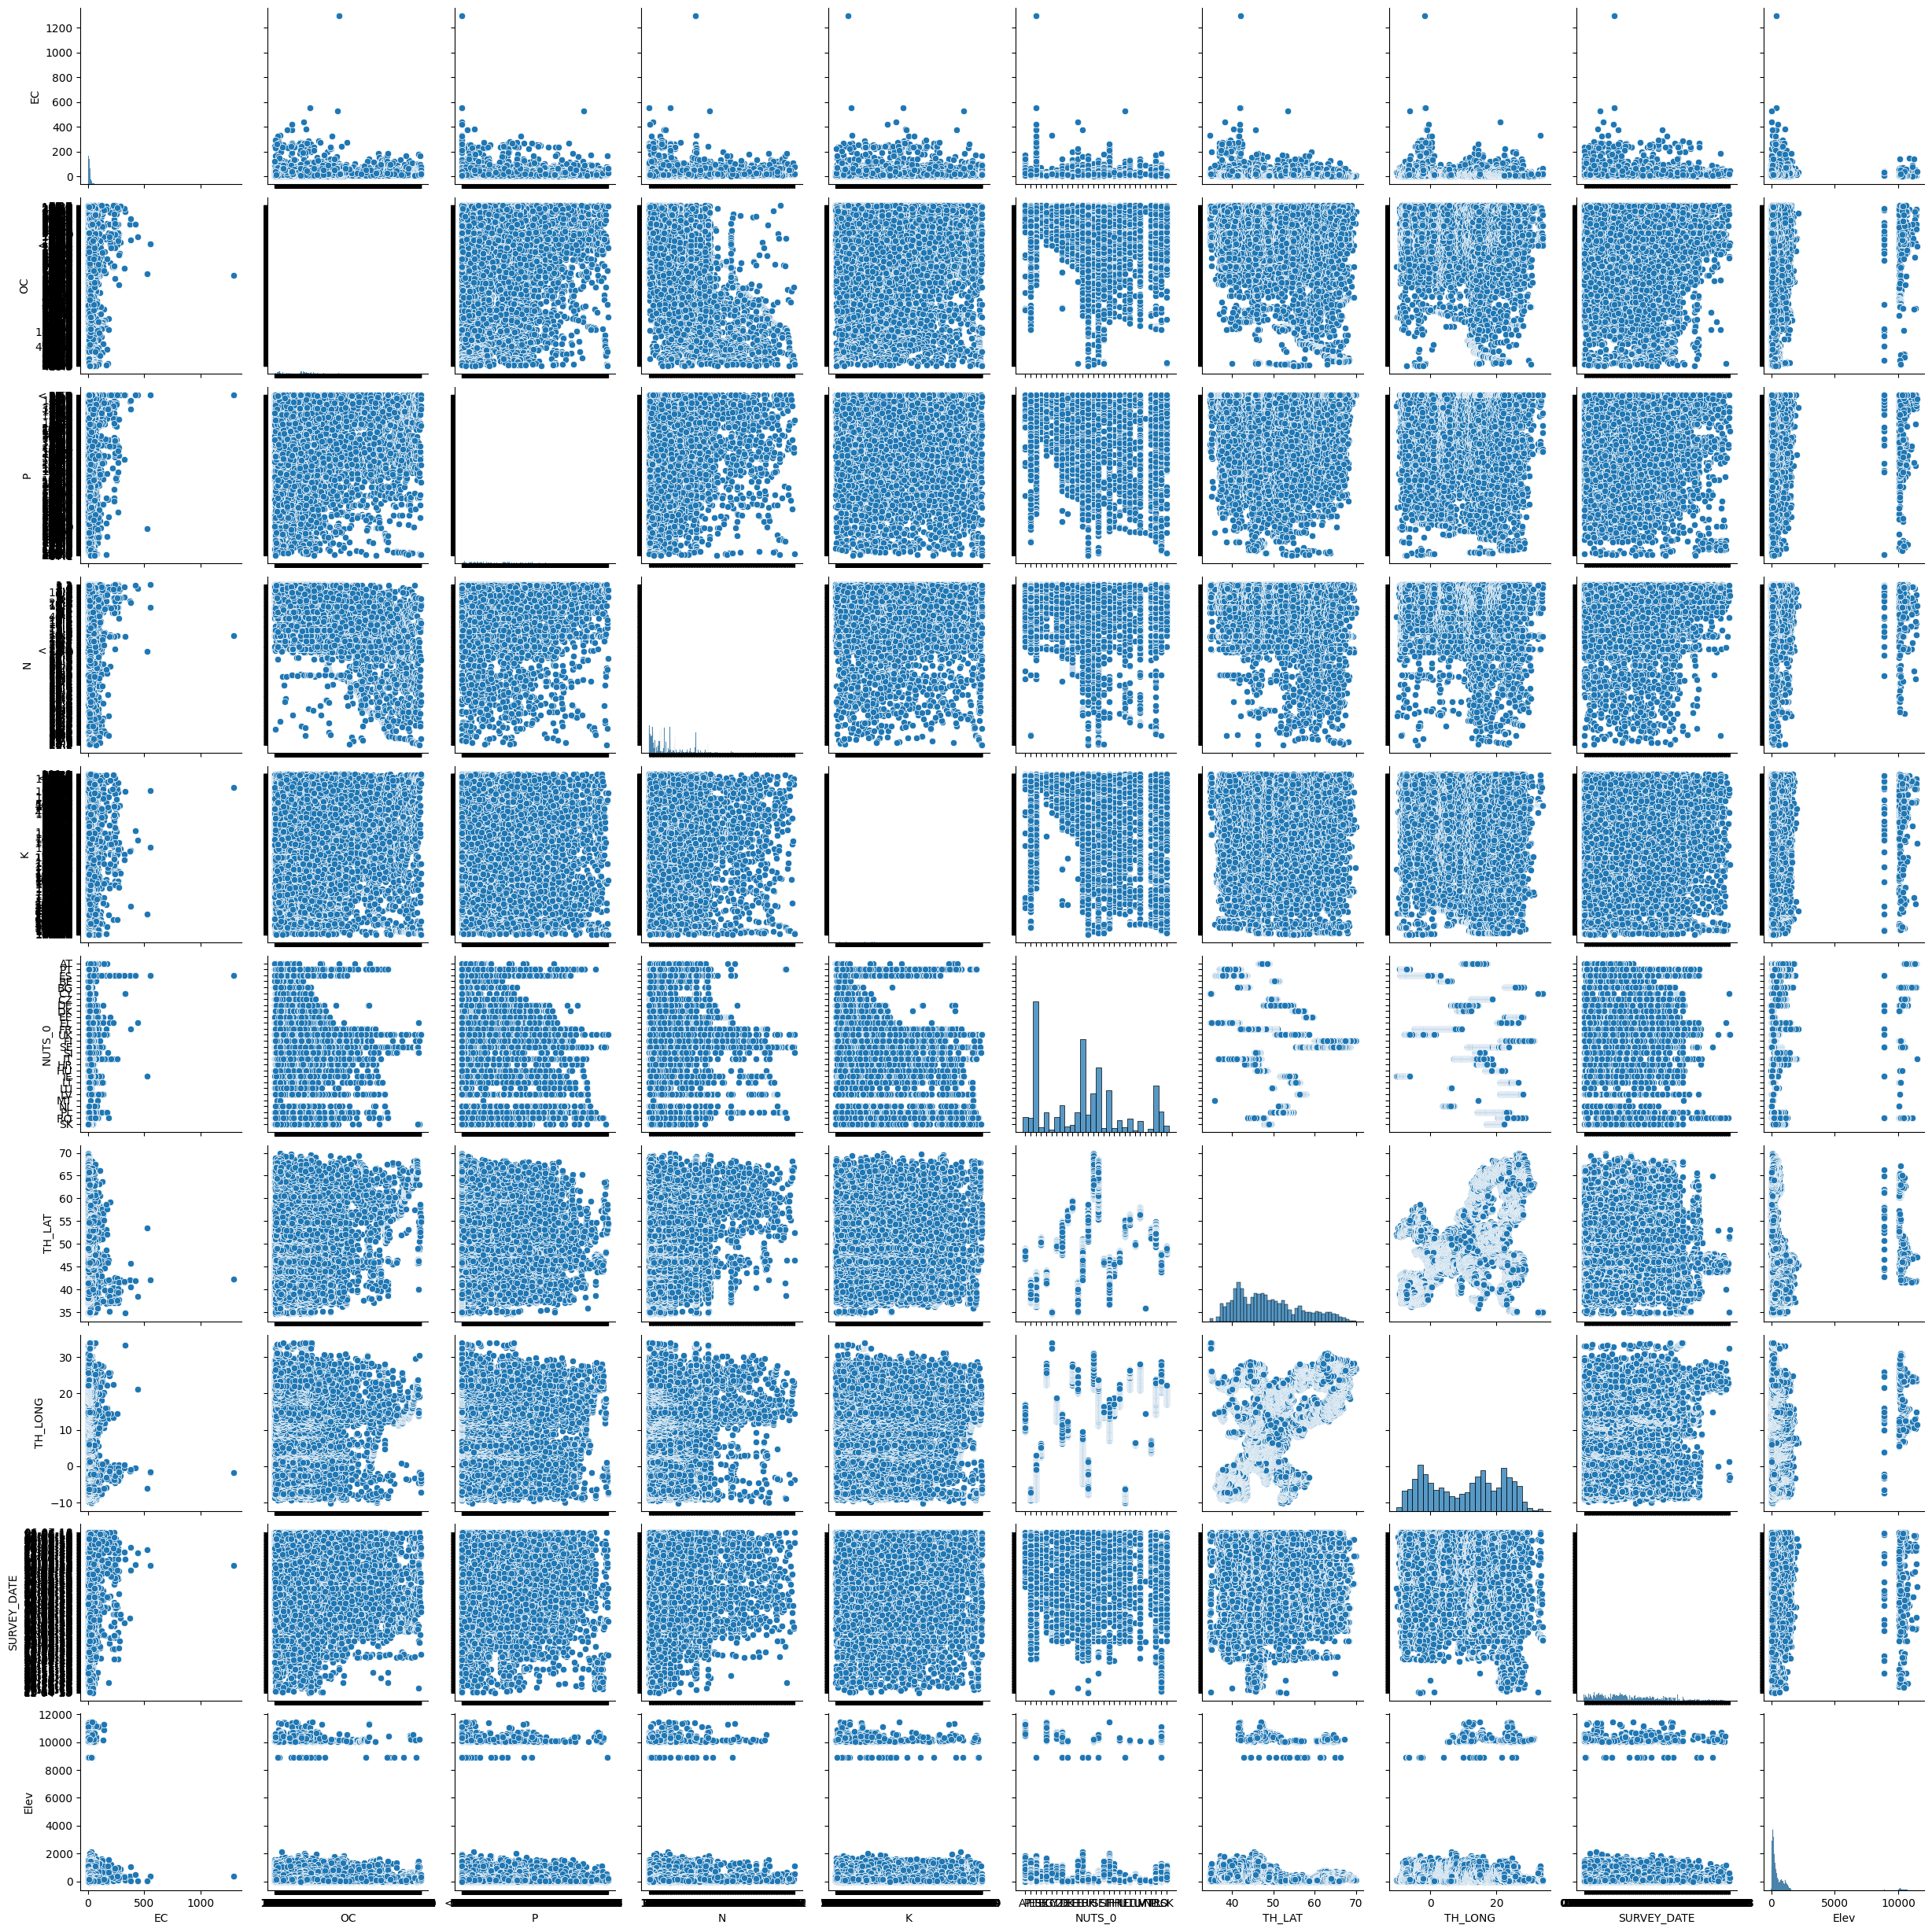

In [22]:
sns.pairplot(data=cleaned_df, vars=['EC', 'OC', 'P', 'N', 'K', 'NUTS_0', 'TH_LAT', 'TH_LONG',
       'SURVEY_DATE', 'Elev'])